<a href="https://colab.research.google.com/github/GengGengGengGeng/D4/blob/main/Lab11_Ding_Geng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [ ]:
url = 'https://raw.githubusercontent.com/asukul/DS301-f19/master/datasets/Brain-BodySize/brain-bodysize.csv'
data = pd.read_csv(url)
data.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


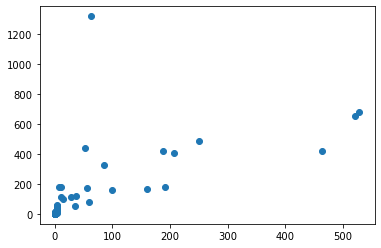

In [ ]:
plt.scatter(data.loc[:,'Brain'], data.loc[:,'Body'])
plt.show()


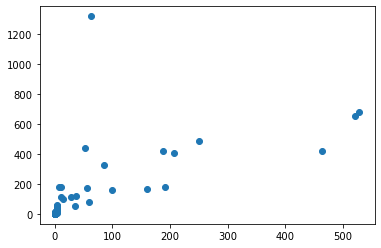

In [ ]:
# below also works
plt.scatter(data.iloc[:,0], data.iloc[:,1])
plt.show()

#### fit a linear model

In [ ]:
X = data[['Brain']]
y = data[['Body']]
print(X)
print(y)

      Brain
0     3.385
1     0.480
2     1.350
3   465.000
4    36.330
5    27.660
6    14.830
7     1.040
8     4.190
9     0.425
10    0.101
11    0.920
12    1.000
13    0.005
14    0.060
15    3.500
16    2.000
17    1.700
18    0.023
19  187.100
20  521.000
21    0.785
22   10.000
23    3.300
24    0.200
25    1.410
26  529.000
27  207.000
28   85.000
29    0.750
30   62.000
31    3.500
32    6.800
33   35.000
34    4.050
35    0.120
36    0.023
37    0.010
38    1.400
39  250.000
40    2.500
41   55.500
42  100.000
43   52.160
44   10.550
45    0.550
46   60.000
47    3.600
48    4.288
49    0.280
50    0.075
51    0.122
52    0.048
53  192.000
54    3.000
55  160.000
56    0.900
57    1.620
58    0.104
59    4.235
       Body
0     44.50
1     15.50
2      8.10
3    423.00
4    119.50
5    115.00
6     98.20
7      5.50
8     58.00
9      6.40
10     4.00
11     5.70
12     6.60
13     0.14
14     1.00
15    10.80
16    12.30
17     6.30
18     0.30
19   419.00
20   655.00
21  

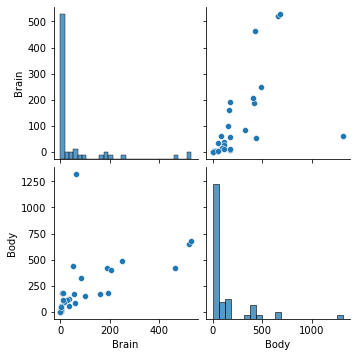

In [ ]:
sns.pairplot(data)

<AxesSubplot:xlabel='Brain', ylabel='Body'>

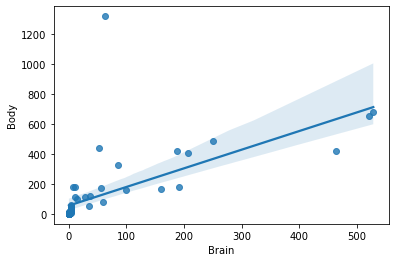

In [ ]:
sns.regplot(data=data, x='Brain', y='Body')

In [ ]:
model1 = LinearRegression().fit(X,y)
model1.score(X,y)

0.42322727989153086

## NOTE that here I need to make it to numpy array in order to do the prediction
## OR pandas dataframe

In [ ]:
## dataframe
new1 = pd.DataFrame([[2.8]])
print(model1.predict(new1))

## numpy array
new2 = np.array([[5.6]])
print(model1.predict(new2))

new3 = np.array([[28]])
print(model1.predict(new3))

###Below is not working
# new4 = 28
# print(model1.predict(new4))


[[59.43145292]]
[[62.91104865]]
[[90.7478145]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Calculate RMSE, R2

# For linear regression there is no "accuracy score", accuracy score is not for continous data

# model.score: Return the coefficient of determination of the prediction.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 90)
#print(X_train)
model2 = LinearRegression().fit(X_train, y_train)
y_pred = model2.predict(X_test)
print("RMSE: ", mean_squared_error(y_true = y_test, y_pred = y_pred))
print("R2: ", r2_score(y_true = y_test, y_pred = y_pred))
print("model.score: ",norm_model.score(X_train, y_train))

RMSE:  5037.706956594284
R2:  0.8059655506986935
model.score:  0.08741681676921675


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


### Data transformation: Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
std = StandardScaler()
std.fit(X_train, X_test)
std_norm_X_train = std.transform(X_train)
std_norm_X_test = std.transform(X_test)

std.fit(y_train, y_test)
std_norm_y_train = std.transform(y_train)
std_norm_y_test = std.transform(y_test)
#print(X_test,'\n',std_norm_X_test, type(std_norm_X_test))
#print(y_test,'\n',std_norm_y_test)
#print(X_train,'\n',std_norm_X_train)
#print(y_train,'\n',std_norm_y_train)

In [ ]:
norm_model = LinearRegression().fit(std_norm_X_train, std_norm_y_train)

norm_y_pred = norm_model.predict(std_norm_X_test)


print("RMSE:", mean_squared_error(y_true = std_norm_y_test, y_pred = norm_y_pred))
print("R2:", r2_score(y_true = std_norm_y_test, y_pred = norm_y_pred))
print("model.score:",norm_model.score(std_norm_X_train, std_norm_y_train))

RMSE: 0.08178688228000813
R2: 0.8059655506986934
model.score: 0.34796827226022453


<AxesSubplot:>

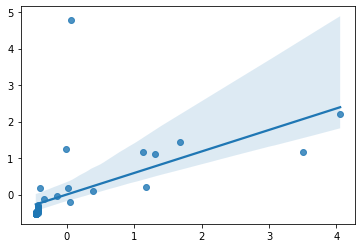

In [ ]:
sns.regplot(data=data, x=std_norm_X_train, y=std_norm_y_train)

<AxesSubplot:xlabel='Brain', ylabel='Body'>

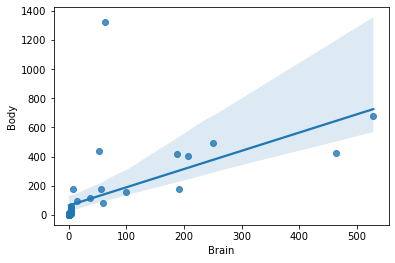

In [ ]:
sns.regplot(data=data, x=X_train, y=y_train)

<AxesSubplot:>

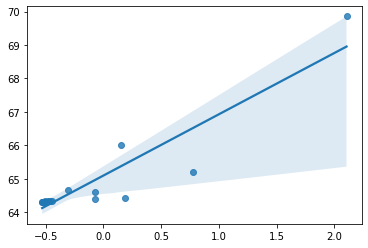

In [ ]:
sns.regplot(data=data, x=std_norm_y_test, y=norm_y_pred)

<AxesSubplot:xlabel='Body'>

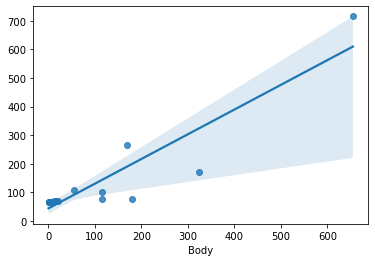

In [ ]:
sns.regplot(data=data, x=y_test, y=y_pred)